<a href="https://colab.research.google.com/github/nietzscholas9000/UsedCarsProject/blob/master/RandomForrest_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Random forrest PCA

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Loading the dataset
try:
  dataset = pd.read_csv('drive/My Drive/processed.csv')
except:
  dataset = pd.read_csv('processed.csv')

# print(dataset)

X = dataset.iloc[:,2:].values #We are not using column 1. Also we slice it this way because we want X to be a matrix
y = dataset.iloc[:,1].values

#Splitting the data into Training Set and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [0]:
# Import required libraries for PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#Normalizing the features
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

#Linear PCA
PCAObj = PCA(n_components=None, random_state=42)
X_train = PCAObj.fit_transform(X_train)
X_test = PCAObj.transform(X_test)

Number of components with 0.95 cumulative variance:  253


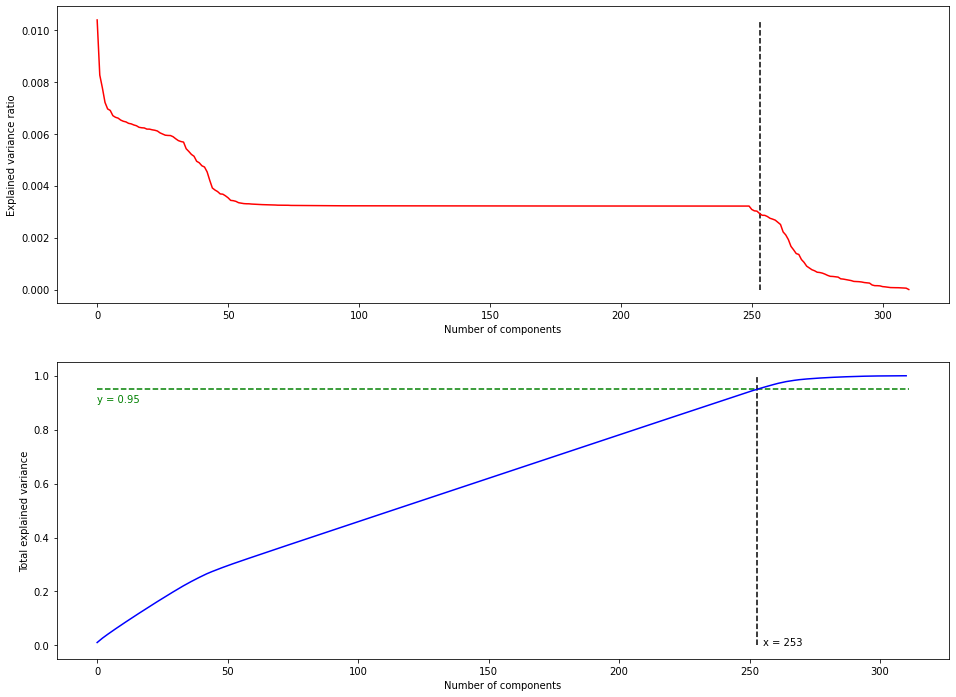

In [8]:
# Define cumulative explained variance ratio
total_variance = np.cumsum(PCAObj.explained_variance_ratio_)

# Show when total_variance is 0.95 using a plot
plt.figure(1, figsize=[16,12])
plot1 = plt.subplot(211)
plt.plot(PCAObj.explained_variance_ratio_, c='red')
plt.xlabel('Number of components')
plt.ylabel('Explained variance ratio')

plot2 = plt.subplot(212)
plt.plot(total_variance, c='blue')
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
# Look for where cumulative explained variance is 0.95
expl_95_index = np.where((total_variance > 0.949) & (total_variance < 0.951))[0][0]
print('Number of components with 0.95 cumulative variance: ', expl_95_index)
plt.hlines(0.95, 0, len(total_variance), linestyles='dashed', color='green')
plt.vlines(expl_95_index, 0, 1, linestyles='dashed')
plot1.vlines(expl_95_index, 0, np.max(PCAObj.explained_variance_ratio_), linestyles='dashed')
plt.text(0, 0.95-0.05, 'y = 0.95', color='green')
plt.text(expl_95_index+2, 0, 'x = '+str(expl_95_index))

plt.show()

In [0]:
%reset_selective -f ^(?!expl_95_index).*$

In [0]:
#Linear PCA

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Loading the dataset
try:
  dataset = pd.read_csv('drive/My Drive/processed.csv')
except:
  dataset = pd.read_csv('processed.csv')

# print(dataset)

X = dataset.iloc[:,2:].values #We are not using column 1. Also we slice it this way because we want X to be a matrix
y = dataset.iloc[:,1].values

#Splitting the data into Training Set and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [13]:
# Import required libraries for making a PCA pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline

# Pipeline for predicting the target
RF_PCA_pipeline = Pipeline([
                    ('scale', StandardScaler()), 
                    ('PCA', PCA(n_components=expl_95_index, random_state=0)),
                    ('RF', RandomForestRegressor(random_state=0, warm_start=True))
                     ], verbose=True)
grid_param = dict(rf__n_estimators=[10, 30, 50],
                  rf__min_impurity_decrease=[0.0001, 0.0005, 0.001, 0.005, 0.01],
                  rf__bootstrap=[True,False])
# Using a grid search to test parameters
from sklearn.model_selection import GridSearchCV

searchObj = GridSearchCV(RF_PCA_pipeline, grid_param, cv=10, scoring='neg_mean_squared_error', n_jobs=-1, verbose=10)
searchObj.fit(X_train, y_train)
print(searchObj.best_params_)  
print(searchObj.best_score_)
print(searchObj.cv_results_)

RF_PCA_pipeline.fit(X_train, y_train)
y_pred = RF_PCA_pipeline.predict(X_test)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.5s


ValueError: ignored

In [0]:
# Evaluating the model
print(mean_squared_error(y_test, y_pred))

print(y_test)
print(y_pred)
print(mean_squared_error(10**y_test, 10**y_pred))

In [0]:
grid_param = dict(rf__n_estimators=[10, 30, 50],
                  rf__min_impurity_decrease=[0.0001, 0.0005, 0.001, 0.005, 0.01],
                  rf__bootstrap=[True,False])
plt.plot(grid_param['rf__min_impurity_decrease'], mean_scores[0,:,0],
         grid_param['rf__min_impurity_decrease'], mean_scores[0,:,1],
         grid_param['rf__min_impurity_decrease'], mean_scores[0,:,2]
         )
plt.ylabel('validation MSE (log-scale)')
plt.xlabel('minimum impurity decrease of Random Forest')
plt.title('Validation Scores for Boostrap=True')
plt.legend(grid_param['rf__n_estimators'])
plt.show()